Training FFNN...
Epoch 1/10, Train Loss: 0.2955, Val Loss: 0.1699
Epoch 2/10, Train Loss: 0.1205, Val Loss: 0.1243
Epoch 3/10, Train Loss: 0.0850, Val Loss: 0.1316
Epoch 4/10, Train Loss: 0.0650, Val Loss: 0.1408
Epoch 5/10, Train Loss: 0.0563, Val Loss: 0.1374
Epoch 6/10, Train Loss: 0.0456, Val Loss: 0.1552
Epoch 7/10, Train Loss: 0.0385, Val Loss: 0.1510
Epoch 8/10, Train Loss: 0.0294, Val Loss: 0.1436
Epoch 9/10, Train Loss: 0.0261, Val Loss: 0.2017
Epoch 10/10, Train Loss: 0.0233, Val Loss: 0.1750
Visualizing Network Structure...


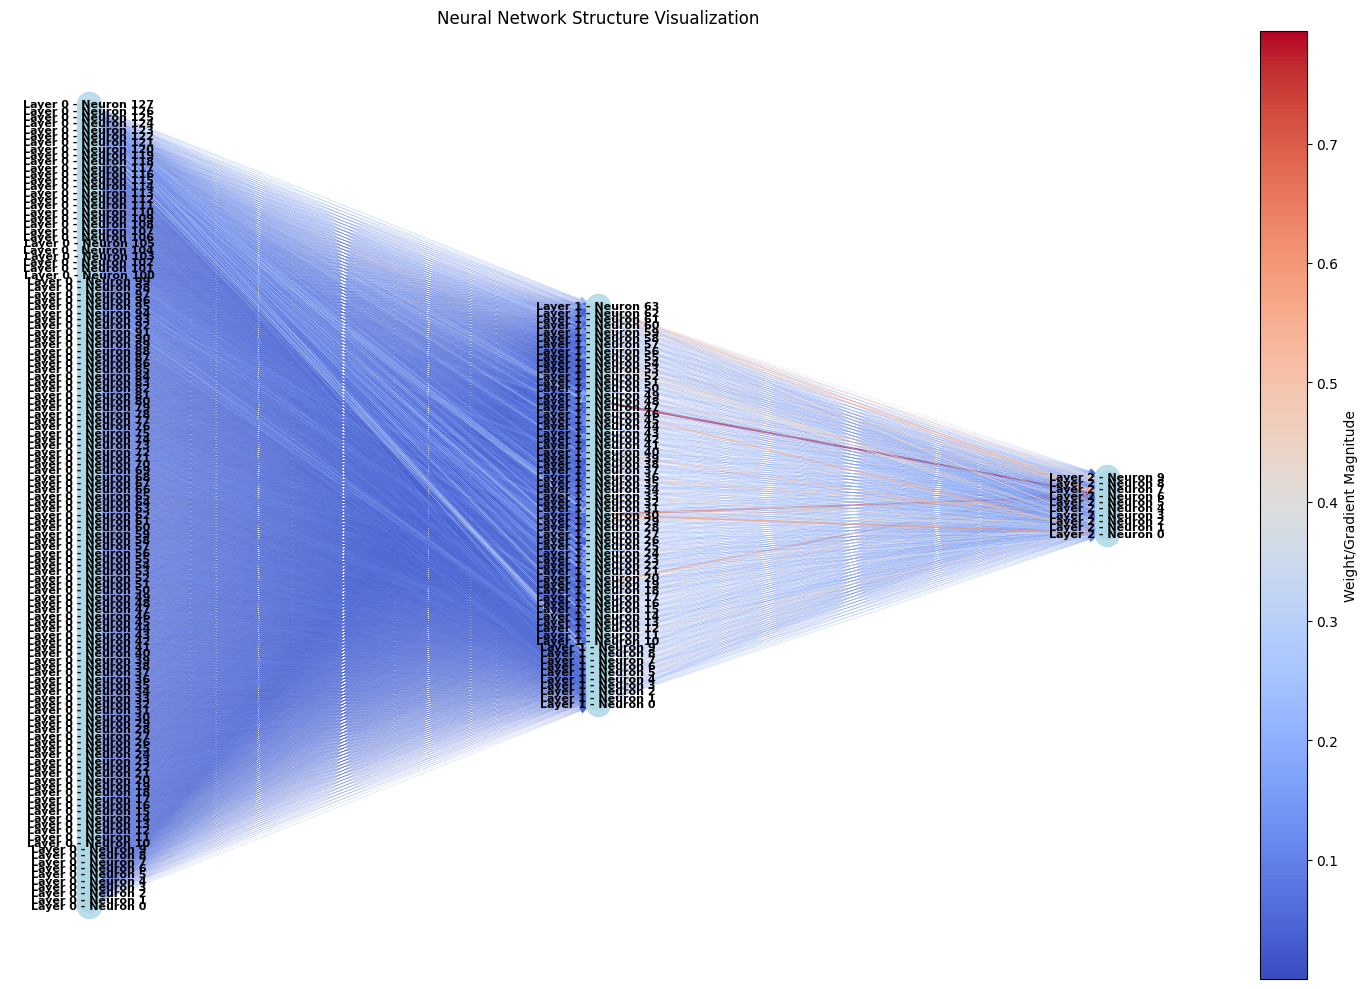

Visualizing Weight Distribution...


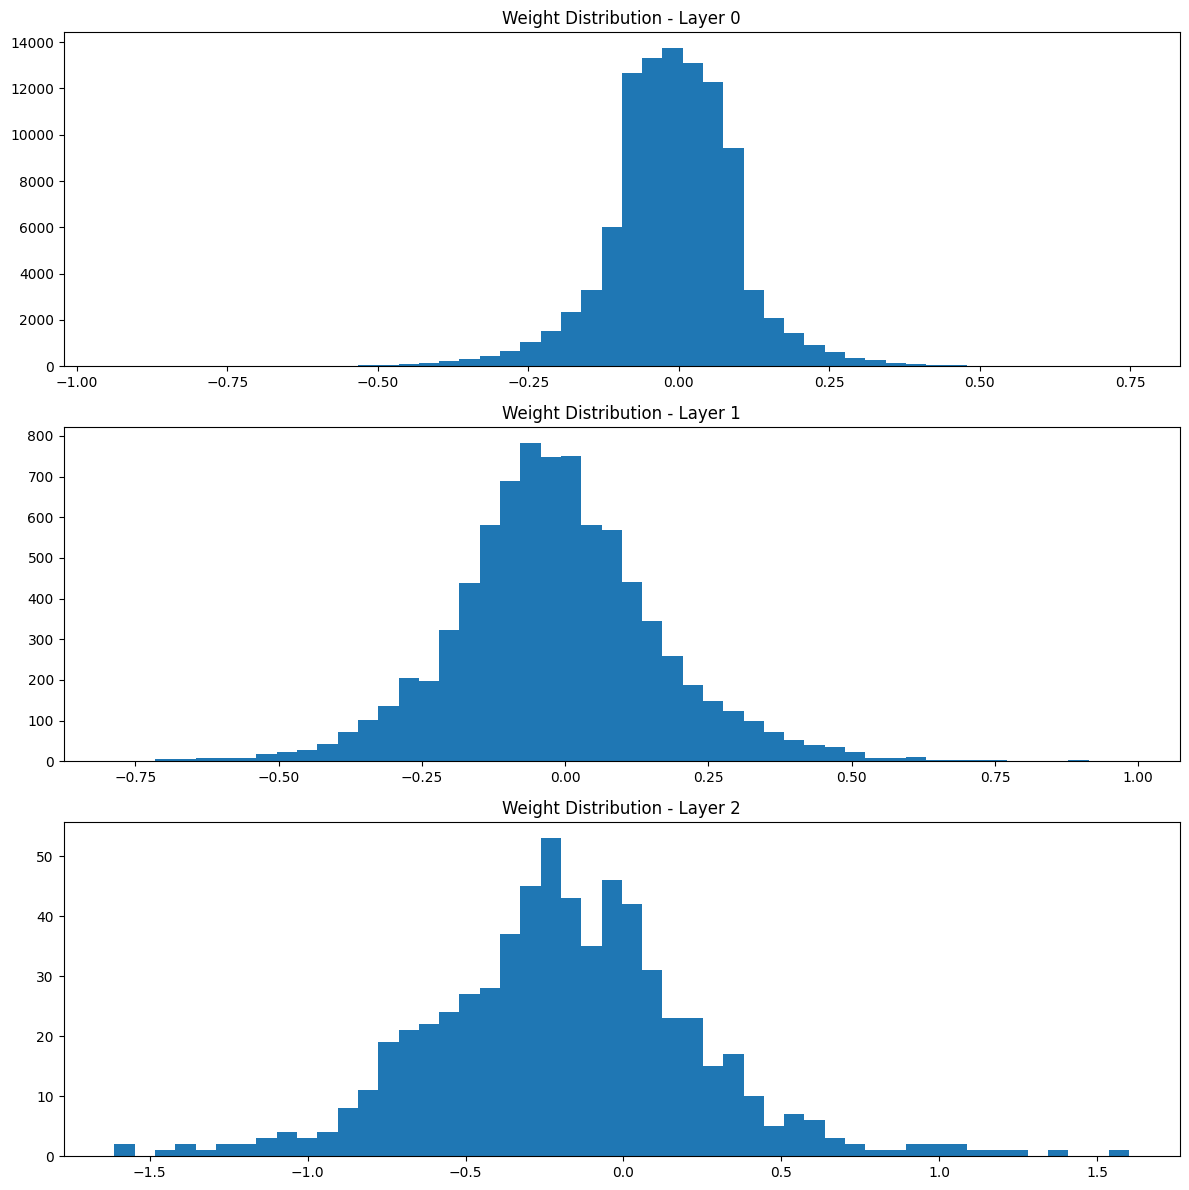

Visualizing Gradient Distribution...


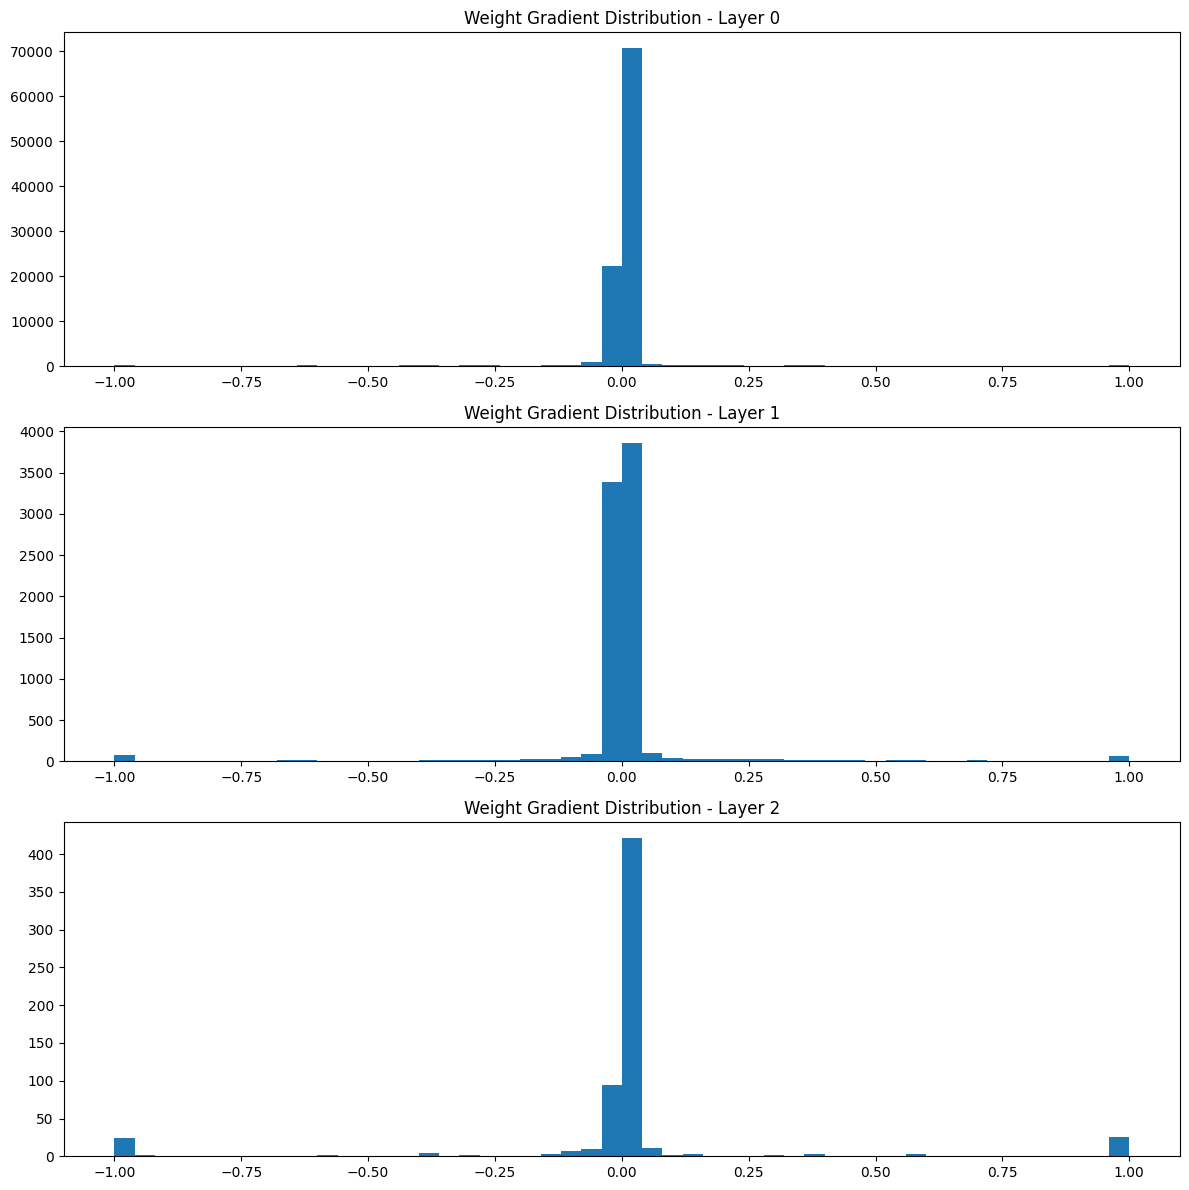

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from ffnn import FFNN 

def load_mnist_dataset():
    mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
    X, y = mnist.data, mnist.target
    X = X.astype('float32') / 255.0 
    y = y.astype('int')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    y_train_onehot = np.eye(10)[y_train]
    y_test_onehot = np.eye(10)[y_test]
    return X_train, X_test, y_train, y_test, y_train_onehot, y_test_onehot

def visualize_ffnn_structure(model):
    print("Visualizing Network Structure...")
    model.visualize_network_structure(highlight_weights=True, highlight_gradients=False)

def visualize_weight_distribution(model):
    print("Visualizing Weight Distribution...")
    layers_to_visualize = range(len(model.layers)) 
    model.plot_weight_distribution(layers=layers_to_visualize)


def visualize_gradient_distribution(model):
    print("Visualizing Gradient Distribution...")
    layers_to_visualize = range(len(model.layers)) 
    model.plot_weight_gradient_distribution(layers=layers_to_visualize)

def main():
    X_train, X_test, y_train, y_test, y_train_onehot, y_test_onehot = load_mnist_dataset()

    model = FFNN(
        layer_sizes=[784, 128, 64, 10],
        activation_func=['relu', 'relu', 'softmax'],
        loss_func='cce',
        weight_init='uniform',
        learning_rate=0.01
    )
    print("Training FFNN...")
    model.train(X_train, y_train_onehot, X_test, y_test_onehot, epochs=10, batch_size=64, verbose=1)

    visualize_ffnn_structure(model)

    visualize_weight_distribution(model)

    visualize_gradient_distribution(model)

if __name__ == "__main__":
    main()